# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

###   Import the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
#FOR SCALLING 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#FOR VIF CALCULATION 

from statsmodels.stats.outliers_influence import variance_inflation_factor
# FOR R2 EVALUATION 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#sklearn package for liner regression
from sklearn.linear_model import LinearRegression
# Importing RFE and LinearRegression and logistic Regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Running Your First Training Model
import statsmodels.api as sm  
# For confusion matrix 
from sklearn import metrics
# For Precision score and recall score
from sklearn.metrics import precision_score , recall_score
# For Precision score and recall score tradeoff (curve)
from sklearn.metrics import precision_recall_curve


### Step 1 :  Read and Understand the dataset

In [2]:
df=pd.read_csv("Leads.csv")

In [3]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
df.shape

(9240, 37)

In [5]:
df.columns.tolist()

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [6]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Check the summary of the dataset

df.describe(include="all")

Prospect ID    Lead Number  \
count                                   9240    9240.000000   
unique                                  9240            NaN   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620            NaN   
freq                                       1            NaN   
mean                                     NaN  617188.435606   
std                                      NaN   23405.995698   
min                                      NaN  579533.000000   
25%                                      NaN  596484.500000   
50%                                      NaN  615479.000000   
75%                                      NaN  637387.250000   
max                                      NaN  660737.000000   

                    Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2868         8506        9238   
mean                        NaN         NaN          NaN         NaN   
std                         NaN         NaN          NaN         NaN   
min                         NaN         NaN          NaN         NaN   
25%                         NaN         NaN          NaN         NaN   
50%                         NaN         NaN          NaN         NaN   
75%                         NaN         NaN          NaN         NaN   
max                         NaN         NaN          NaN         NaN   

          Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9103.000000                  9240.000000   
unique          NaN          NaN                          NaN   
top             NaN          NaN                          NaN   
freq            NaN          NaN                          NaN   
mean       0.385390     3.445238                   487.698268   
std        0.486714     4.854853                   548.021466   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                    12.000000   
50%        0.000000     3.000000                   248.000000   
75%        1.000000     5.000000                   936.000000   
max        1.000000   251.000000                  2272.000000   

        Page Views Per Visit  ... Get updates on DM Content Lead Profile  \
count            9103.000000  ...                      9240         6531   
unique                   NaN  ...                         1            6   
top                      NaN  ...                        No       Select   
freq                     NaN  ...                      9240         4146   
mean                2.362820  ...                       NaN          NaN   
std                 2.161418  ...                       NaN          NaN   
min                 0.000000  ...                       NaN          NaN   
25%                 1.000000  ...                       NaN          NaN   
50%                 2.000000  ...                       NaN          NaN   
75%                 3.000000  ...                       NaN          NaN   
max                55.000000  ...                       NaN          NaN   

          City Asymmetrique Activity Index Asymmetrique Profile Index  \
count     7820                        5022                       5022   
unique       7                           3                          3   
top     Mumbai                   02.Medium                  02.Medium   
freq      3222                        3839                       2788   
mean       NaN                         NaN                        NaN   
std        NaN                         NaN                        NaN   
min        NaN                         NaN                        NaN   
25%        NaN                         NaN                        NaN   
50%        NaN                         NaN                  

In [8]:
# checking all the info of the data set like column data types, total entries
df.info()
##from the below the information we can see that there are 7 numerical variables and rest 30 are categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2 : Data Cleaning 

#### HANDLING MISSING DATA


In [9]:
null_perc_1=round(100*(df.isnull().sum()/len(df.index)), 2)
null_perc_1

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Since looking at the Data Frame there were places where "Select" was used we have to check that rows.
df[df["Lead Profile"]=="Select"]

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
10    2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
...                                    ...          ...   
9183  bc77b8ab-253a-443d-802b-d023f8f44ef8       580017   
9221  b92509cd-7f4c-414e-a8af-eb9cf0c89da7       579767   
9226  c3bb1471-53d5-4244-b2e5-4bbb543835c1       579735   
9228  40d3b3cf-d939-49ff-bea5-60e8d4025104       579717   
9233  3f715465-2546-47cd-afa8-8b8dc63b8b43       579622   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
10    Landing Page Submission  Organic Search           No          No   
...                       ...             ...          ...         ...   
9183                      API          Google           No          No   
9221  Landing Page Submission          Google           No          No   
9226                      API      Olark Chat           No          No   
9228  Landing Page Submission          Google           No          No   
9233                      API  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
3             0          1.0                          305   
4             1          2.0                         1428   
10            1          8.0                         1351   
...         ...          ...                          ...   
9183          0          4.0                          952   
9221          0          4.0                         1347   
9226          0          0.0                            0   
9228          1          4.0                         1944   
9233          1         13.0                         1409   

      Page Views Per Visit  ... Get updates on DM Content Lead Profile  \
0                      0.0  ...                        No       Select   
1                      2.5  ...                        No       Select   
3                      1.0  ...                        No       Select   
4                      1.0  ...                        No       Select   
10                     8.0  ...                        No       Select   
...                    ...  ...                       ...          ...   
9183                   2.0  ...                        No       Select   
9221                   2.0  ...                        No       Select   
9226                   0.0  ...                        No       Select   
9228                   2.0  ...                        No       Select   
9233                   2.6  ...                        No       Select   

                    City Asymmetrique Activity Index  \
0                 Select                   02.Medium   
1                 Select                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
10    Other Metro Cities                   02.Medium   
...                  ...                         ...   
9183              Select                         NaN   
9221              Mumbai                         NaN   
9226              Select                     01.High   
9228              Mumbai                         NaN   
9233              Select                         NaN   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium                        15.0   
1           

#### There are values in the columns which says "Select" we need to replace them with NaN and then check for null values

In [11]:
# Replacing "Select" with nan

df=df.replace("Select",np.nan)

In [12]:
null_perc=round(100*(df.isnull().sum()/len(df.index)), 2)
null_perc

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Comparing both the null values for better understanding by puting them in data frame

In [13]:
perc_df = pd.DataFrame({'Before': null_perc_1 , 'After': null_perc})
perc_df

Before  After
Prospect ID                                      0.00   0.00
Lead Number                                      0.00   0.00
Lead Origin                                      0.00   0.00
Lead Source                                      0.39   0.39
Do Not Email                                     0.00   0.00
Do Not Call                                      0.00   0.00
Converted                                        0.00   0.00
TotalVisits                                      1.48   1.48
Total Time Spent on Website                      0.00   0.00
Page Views Per Visit                             1.48   1.48
Last Activity                                    1.11   1.11
Country                                         26.63  26.63
Specialization                                  15.56  36.58
How did you hear about X Education              23.89  78.46
What is your current occupation                 29.11  29.11
What matters most to you in choosing a course   29.32  29.32
Search                                           0.00   0.00
Magazine                                         0.00   0.00
Newspaper Article                                0.00   0.00
X Education Forums                               0.00   0.00
Newspaper                                        0.00   0.00
Digital Advertisement                            0.00   0.00
Through Recommendations                          0.00   0.00
Receive More Updates About Our Courses           0.00   0.00
Tags                                            36.29  36.29
Lead Quality                                    51.59  51.59
Update me on Supply Chain Content                0.00   0.00
Get updates on DM Content                        0.00   0.00
Lead Profile                                    29.32  74.19
City                                            15.37  39.71
Asymmetrique Activity Index                     45.65  45.65
Asymmetrique Profile Index                      45.65  45.65
Asymmetrique Activity Score                     45.65  45.65
Asymmetrique Profile Score                      45.65  45.65
I agree to pay the amount through cheque         0.00   0.00
A free copy of Mastering The Interview           0.00   0.00
Last Notable Activity                            0.00   0.00

- **There has been a considerable rise in the null values of "LEAD PROFILE" AND "CITY"**

In [14]:
# Since we need Few columns such as Specialization we will be considering droping values  more than 40%
null_perc[null_perc >=40]

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

###  We are Droping columns :
- Since these columns seems to be not of utter importance **"Prospect_id"** is just uniqueId given to indvividuals 
- While the others did not provide information which was essetial for building a model
- We Can drop **City** and same goes for **Country**
- We can drop **Tag** since be of major assistance 
- We will drop **Lead Number** also as it wont be of any help
- We will drop **Receive More Updates About Our Courses** because it has only one parameter
- Droping columns which have more than 35% Null values


In [15]:
## Droping a few other columns which seems to be of least importance 
drop_columns=["Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","Prospect ID",
              "Do Not Email","Do Not Call","Lead Number","City","Country","Tags","Receive More Updates About Our Courses"]

In [16]:
# Removing all the columns that are no required and have 35% and above  null values
drop_columns_1=["How did you hear about X Education","Lead Quality","Lead Profile","Lead Quality","Asymmetrique Activity Index",
              "Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"]

In [17]:
leads=df.copy()

In [18]:
leads=leads.drop(drop_columns,axis=1)

In [19]:
leads=leads.drop(drop_columns_1,axis=1)

In [20]:
leads.shape

(9240, 19)

In [21]:
# Rechecking the percentage of missing values
null_perc_2=round(100*(leads.isnull().sum()/len(leads.index)), 2)

In [22]:
null_perc_2[null_perc_2>0]

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
dtype: float64

- As per the data 3 columns have data if we remove the rows will cost us a huge amount of data . So we will have to replace these values with some appropriate name.

### Filling the missing values for 3 Columns

In [23]:
leads["Specialization"]=leads["Specialization"].fillna("Missing_Spec")

In [24]:
leads["What is your current occupation"]=leads["What is your current occupation"].fillna("Missing_Occup")

In [25]:
leads["What matters most to you in choosing a course"]=leads["What matters most to you in choosing a course"].fillna("Missing_matter")

In [26]:
leads.Specialization.value_counts()

Missing_Spec                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Removing Rows with less Percentage of Missing Values

In [27]:
leads = leads[~pd.isnull(leads['Lead Source'])]


In [28]:
leads = leads[~pd.isnull(leads['TotalVisits'])]


In [29]:
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]

In [30]:
leads = leads[~pd.isnull(leads['Last Activity'])]

In [31]:
null_perc_final=round(100*(leads.isnull().sum()/len(leads.index)), 2)

In [32]:
null_perc_final

Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                         

### Checking the value counts of all the columns


In [33]:
for c in leads:
    print("Name of the colummn:-",c)
    print(leads[c].astype('category').value_counts())
    print('---------------------------------------------------------------')

Name of the colummn:- Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
---------------------------------------------------------------
Name of the colummn:- Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
---------------------------------------------------------------
Name of the colummn:- Converted
0    5639
1    3435
Name: Converte

- We can drop **Magzine**  , **Newspaper Article**, **Newspaper**,**Newspaper Article**,**Digital Advertisement**,**Through Recommendations** we can drop these columns also


In [34]:
drop_var=["Newspaper Article","X Education Forums","Newspaper","Magazine","Digital Advertisement","Through Recommendations"]

In [35]:
leads.shape



(9074, 19)

In [36]:
leads=leads.drop(drop_var,axis=1)



In [37]:
leads.shape

(9074, 13)

- **Data is clean and now we can me further for EDA**

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

###  Step 3: PERFORMING EDA


- For categorical variables, we'll analyse the counts.
- For numerical variable, we'll describe the variable and analyse the box plots.

### UNI VARIANTE ANALYSIS

In [38]:
leads.shape

(9074, 13)

In [39]:
## FOR CATEGORICAL COLUMNS:

In [40]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Converted                                      9074 non-null   int64  
 3   TotalVisits                                    9074 non-null   float64
 4   Total Time Spent on Website                    9074 non-null   int64  
 5   Page Views Per Visit                           9074 non-null   float64
 6   Last Activity                                  9074 non-null   object 
 7   Specialization                                 9074 non-null   object 
 8   What is your current occupation                9074 non-null   object 
 9   What matters most to you in choosing a course  9074 

In [41]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6370
Missing_matter               2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
leads.select_dtypes(include='object')

Lead Origin     Lead Source            Last Activity  \
0                         API      Olark Chat  Page Visited on Website   
1                         API  Organic Search             Email Opened   
2     Landing Page Submission  Direct Traffic             Email Opened   
3     Landing Page Submission  Direct Traffic              Unreachable   
4     Landing Page Submission          Google        Converted to Lead   
...                       ...             ...                      ...   
9235  Landing Page Submission  Direct Traffic        Email Marked Spam   
9236  Landing Page Submission  Direct Traffic                 SMS Sent   
9237  Landing Page Submission  Direct Traffic                 SMS Sent   
9238  Landing Page Submission          Google                 SMS Sent   
9239  Landing Page Submission  Direct Traffic                 SMS Sent   

                 Specialization What is your current occupation  \
0                  Missing_Spec                      Unemployed   
1                  Missing_Spec                      Unemployed   
2       Business Administration                         Student   
3         Media and Advertising                      Unemployed   
4                  Missing_Spec                      Unemployed   
...                         ...                             ...   
9235     IT Projects Management                      Unemployed   
9236      Media and Advertising                      Unemployed   
9237    Business Administration                      Unemployed   
9238  Human Resource Management                   Missing_Occup   
9239    Supply Chain Management                      Unemployed   

     What matters most to you in choosing a course Search  \
0                          Better Career Prospects     No   
1                          Better Career Prospects     No   
2                          Better Career Prospects     No   
3                          Better Career Prospects     No   
4                          Better Career Prospects     No   
...                                            ...    ...   
9235                       Better Career Prospects     No   
9236                       Better Career Prospects     No   
9237                       Better Career Prospects     No   
9238                                Missing_matter     No   
9239                       Better Career Prospects     No   

     A free copy of Mastering The Interview Last Notable Activity  
0                                        No              Modified  
1                                        No          Email Opened  
2                                       Yes          Email Opened  
3                                        No              Modified  
4                                        No              Modified  
...                                     ...                   ...  
9235                                     No     Email Marked Spam  
9236                                    Yes              SMS Sent  
9237                                    Yes              SMS Sent  
9238                                     No              SMS Sent  
9239                                    Yes              Modified  

[9074 rows x 9 columns]

In [43]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
cat_col=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","What matters most to you in choosing a course",
        "Search","A free copy of Mastering The Interview","Last Notable Activity"]

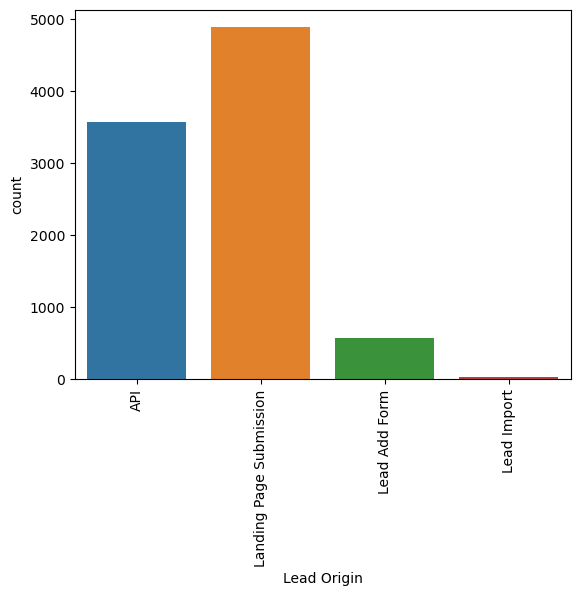

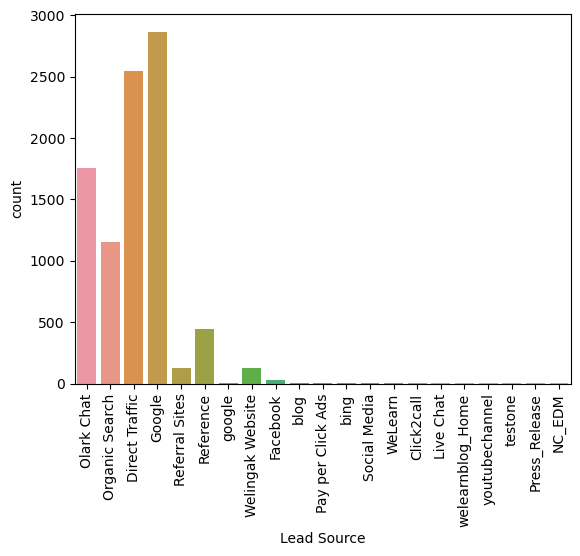

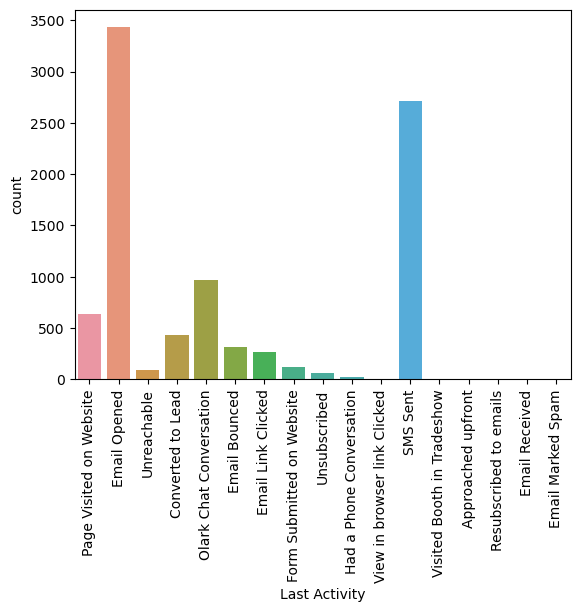

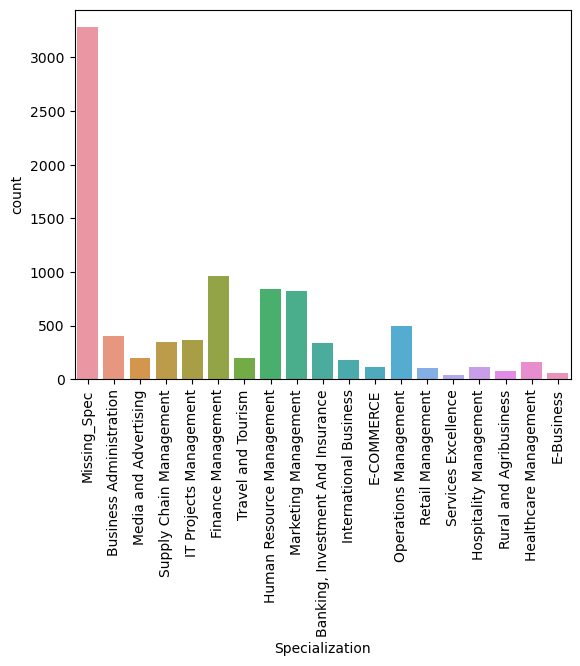

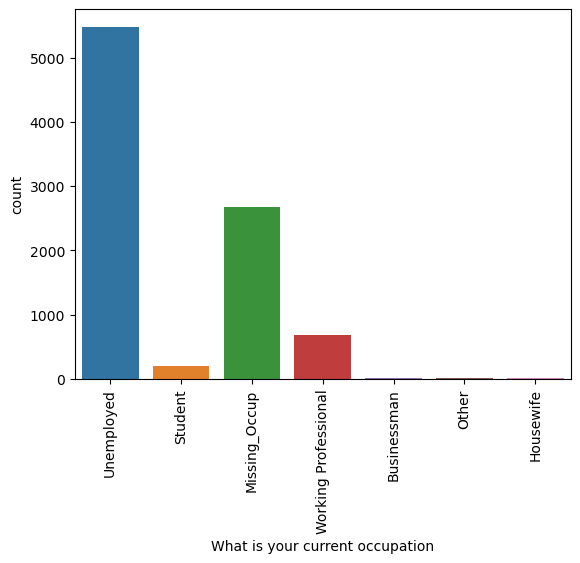

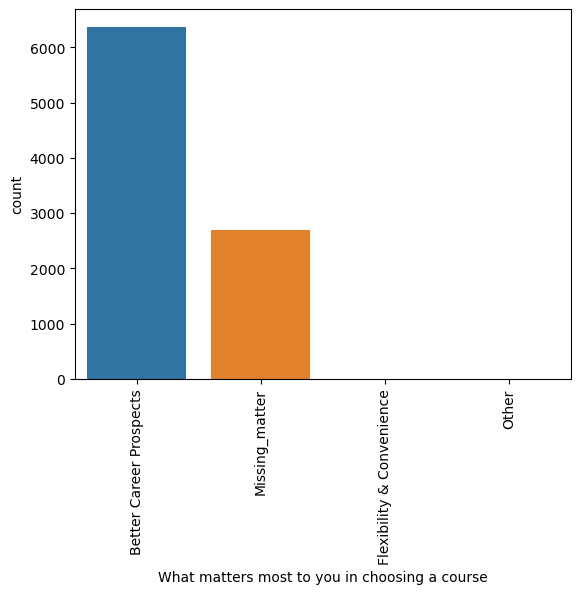

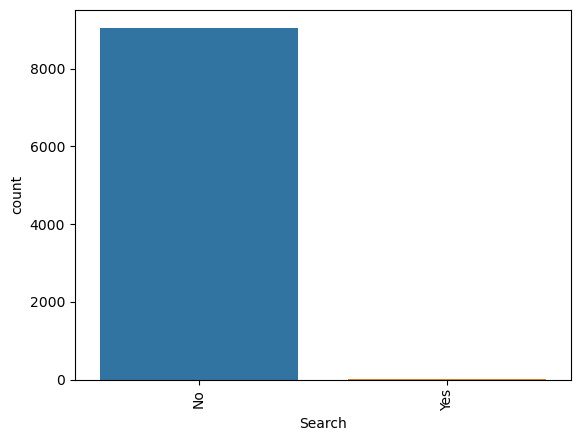

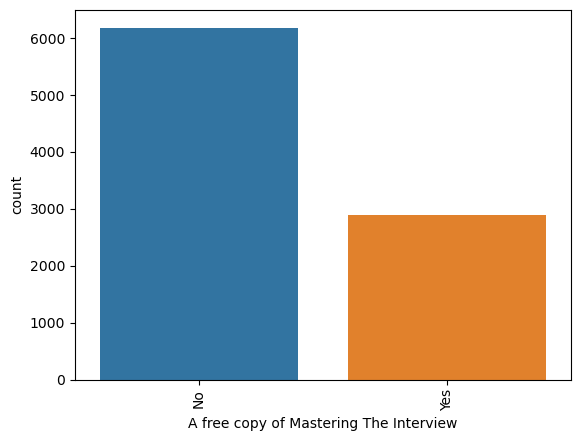

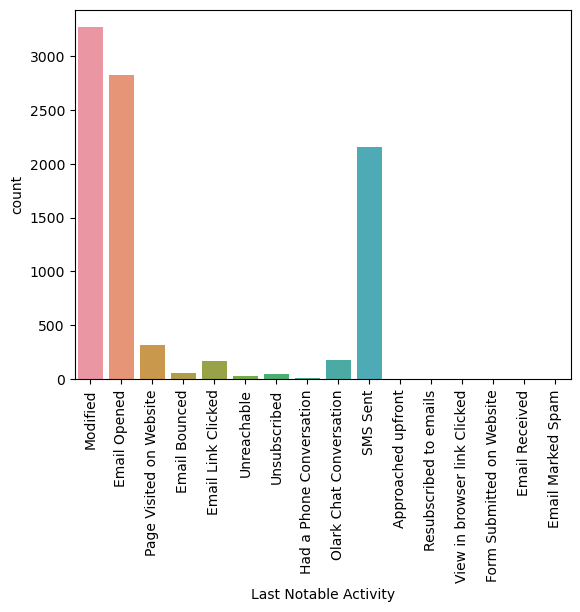

In [45]:
for i in cat_col:
    sns.countplot(leads[i])
    plt.xticks(rotation=90)
    plt.show()

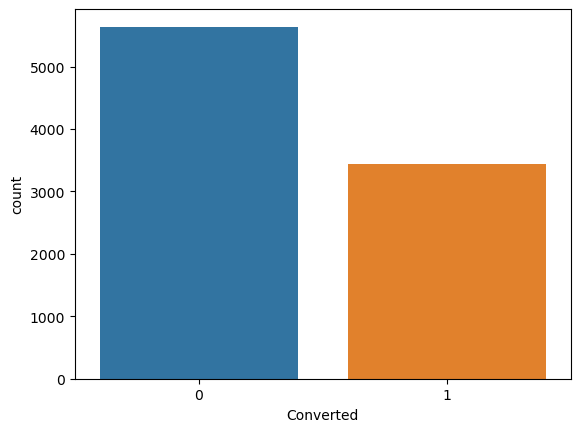

In [46]:
sns.countplot(leads['Converted'])
plt.show()

**Conclusion**:- 
- More than 50% of the people have converted 
- Lead Source is "Google"
- Most Promisiing last activity is either Opening an E-mail or is SMS
- Fianace . HR , Marketing and Operations are the few which have high scale , however a majority of people have not specfied their specilization
- Unemployed People are likely to search more along with people for Better Career Prospects 


In [47]:
leads.select_dtypes(include=['int',"float"])

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  
0                     0.00  
1                     2.50  
2                     2.00  
3                     1.00  
4                     1.00  
...                    ...  
9235                  2.67  
9236                  2.00  
9237                  2.00  
9238                  3.00  
9239                  3.00  

[9074 rows x 4 columns]

In [48]:
num_col=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

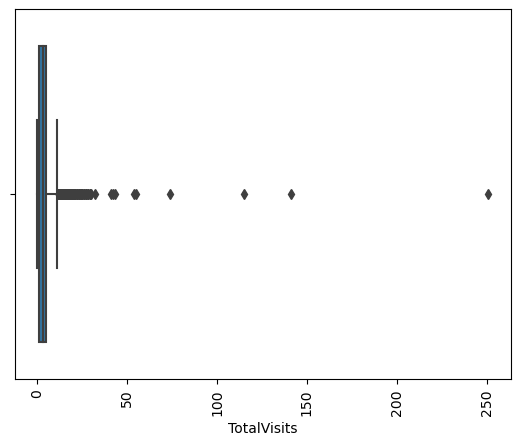

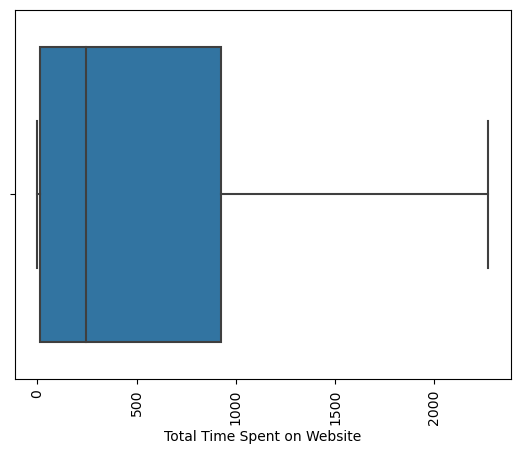

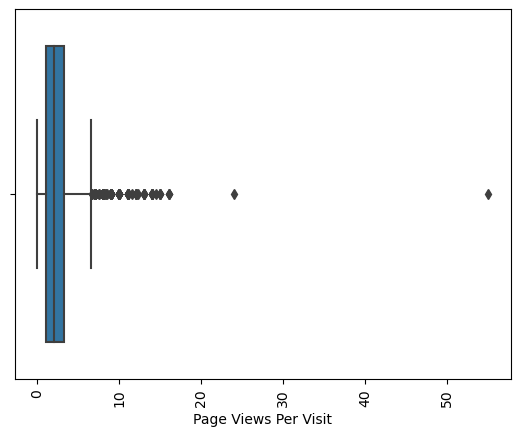

In [49]:
for i in num_col:
    sns.boxplot(leads[i])
    plt.xticks(rotation=90)
    plt.show()

- **Outiliers have been identified in the numeric varibles** 

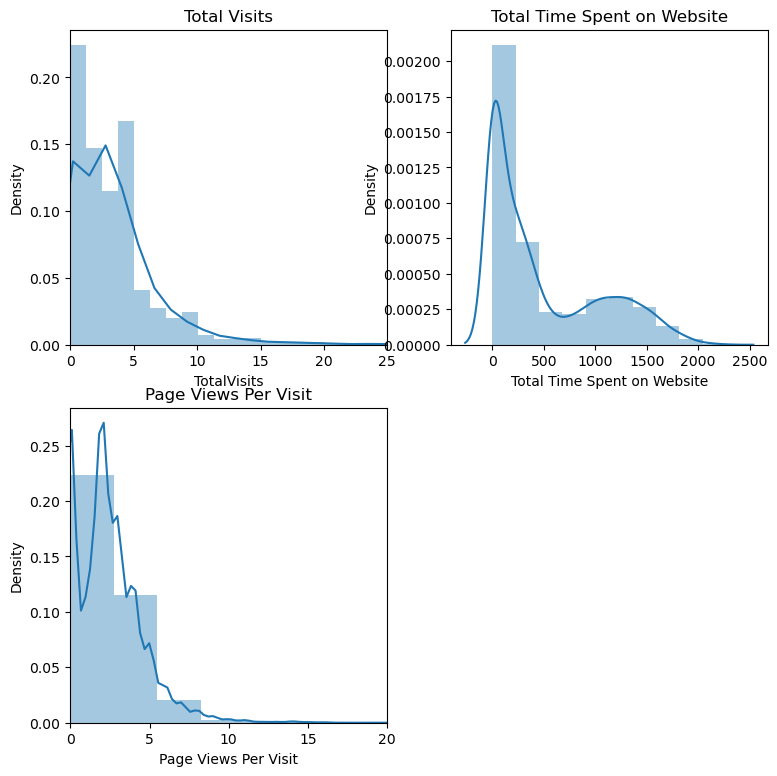

In [50]:
plt.figure(figsize = (9,9))
plt.subplot(221)
sns.distplot(leads['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.distplot(leads['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.distplot(leads['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Handling Outliers
- Lets look at the respective percentile values and check if we can see if there is any sudden increase in the frequency

In [51]:
numeric = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
25%       1.000000                    11.000000              1.000000
50%       3.000000                   246.000000              2.000000
75%       5.000000                   922.750000              3.200000
90%       7.000000                  1373.000000              5.000000
95%      10.000000                  1557.000000              6.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

In [52]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = leads['TotalVisits'].quantile(0.99)
leads = leads[leads["TotalVisits"] < nn_quartile_total_visits]
leads["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8975.000000
mean        3.192535
std         2.934948
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [53]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  8975.000000  8975.000000                  8975.000000   
mean      0.378496     3.192535                   481.180724   
std       0.485039     2.934948                   545.041857   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                     8.500000   
50%       0.000000     3.000000                   244.000000   
75%       1.000000     5.000000                   919.500000   
90%       1.000000     7.000000                  1372.000000   
95%       1.000000     9.000000                  1556.000000   
99%       1.000000    13.000000                  1837.520000   
max       1.000000    16.000000                  2272.000000   

       Page Views Per Visit  
count           8975.000000  
mean               2.341840  
std                2.060971  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               16.000000

In [54]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads["Page Views Per Visit"] < nn_quartile_page_visits]
leads["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    8863.000000
mean        2.236941
std         1.835885
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [55]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  8863.000000  8863.000000                  8863.000000   
mean      0.378089     3.098387                   478.122193   
std       0.484937     2.821961                   544.532372   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                     5.000000   
50%       0.000000     3.000000                   240.000000   
75%       1.000000     4.000000                   913.000000   
90%       1.000000     7.000000                  1371.000000   
95%       1.000000     8.000000                  1553.000000   
99%       1.000000    13.000000                  1837.760000   
max       1.000000    16.000000                  2272.000000   

       Page Views Per Visit  
count           8863.000000  
mean               2.236941  
std                1.835885  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                7.000000  
max                8.000000

In [56]:
# Determine the percentage of data retained

num_data = round(100*(len(leads)/9074),2)
print(num_data)

97.67


- **Outliers have been handled appropriate and maximum Data has been retained**

## **--------------------------------------------------------------------------------------------------------------------------------**

### BI VARIANTE ANALYSIS 


####  Since , Converted is our traget varible we will include all catagorical and numerical varible

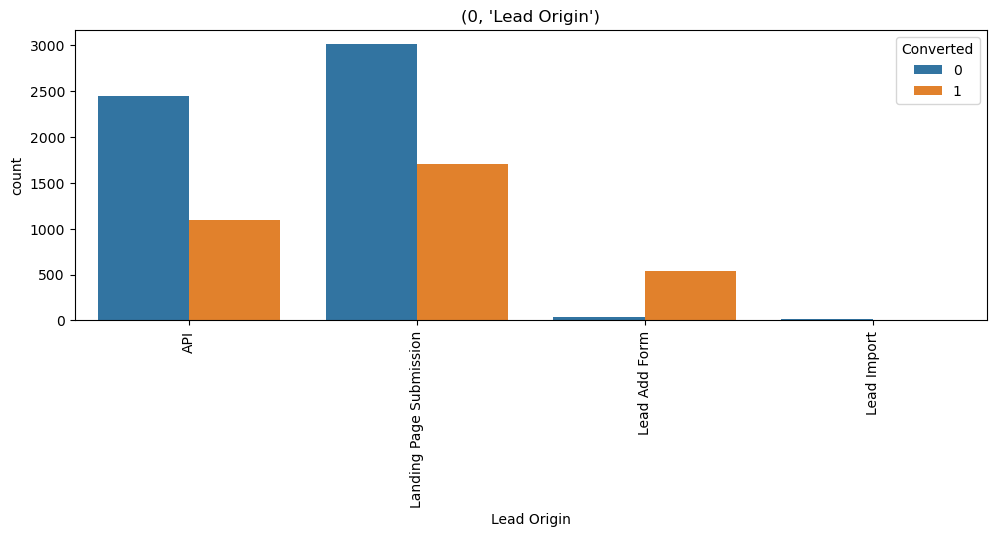

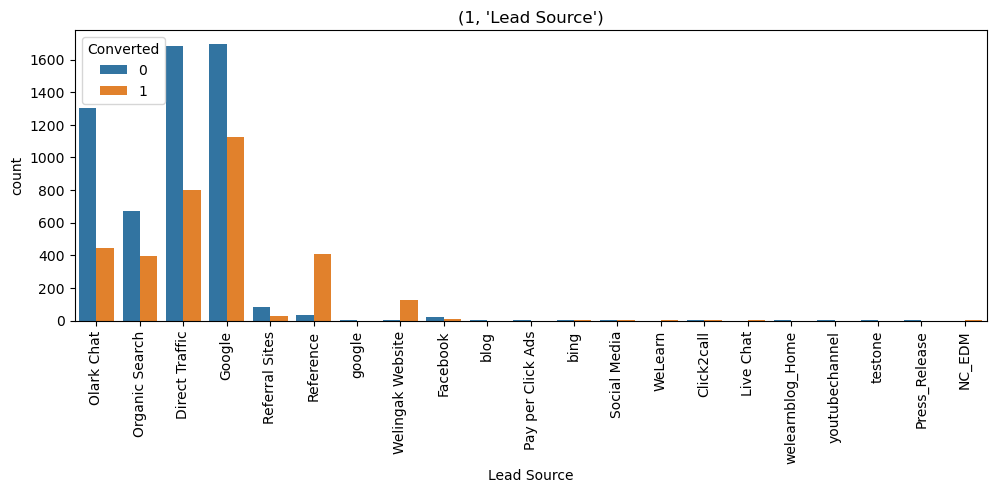

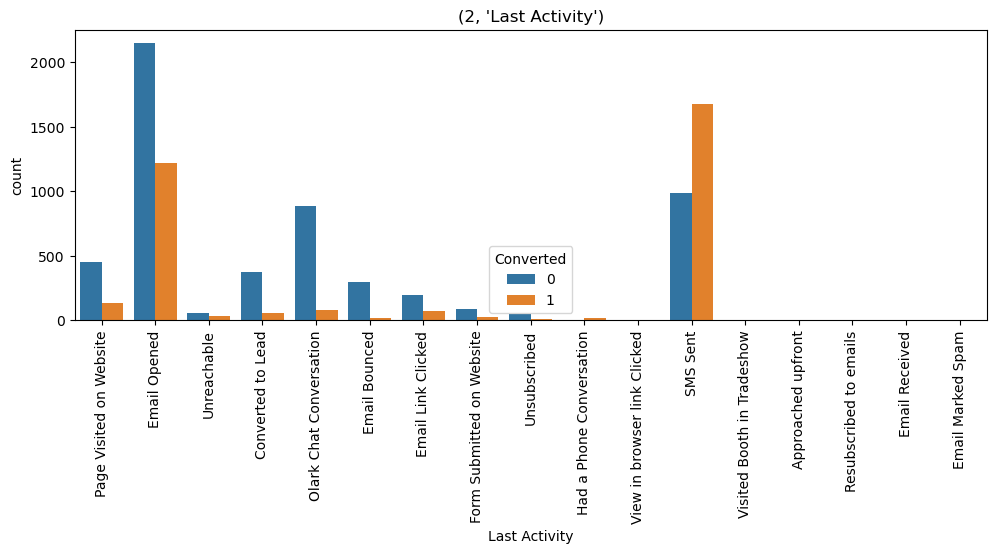

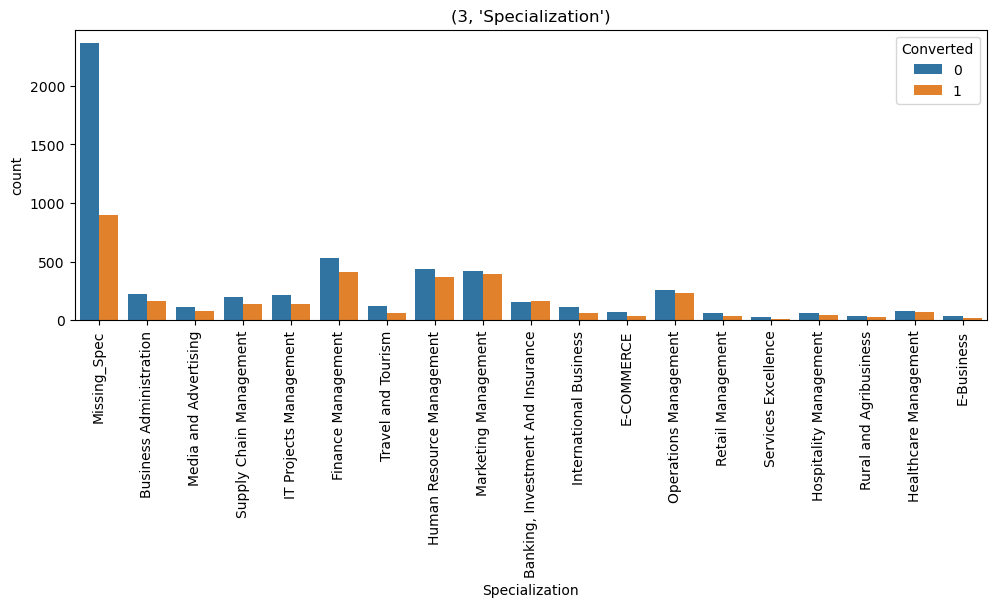

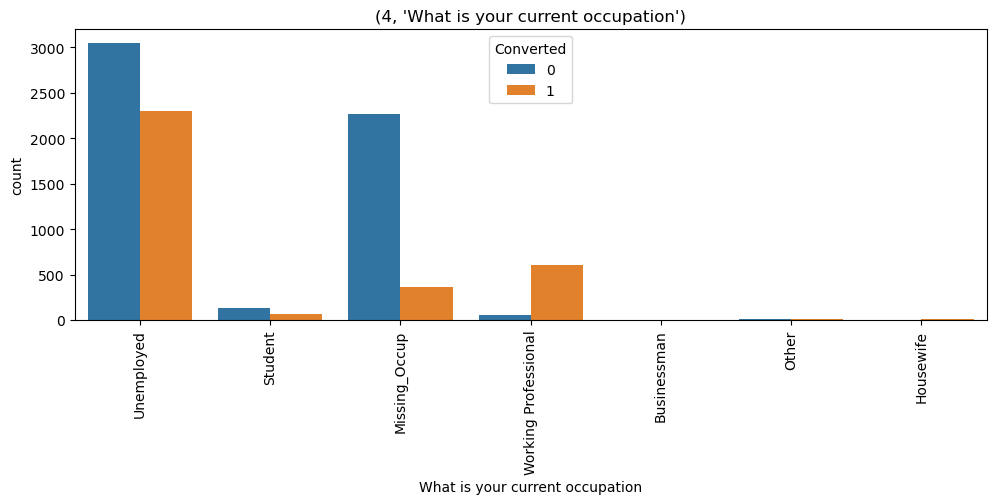

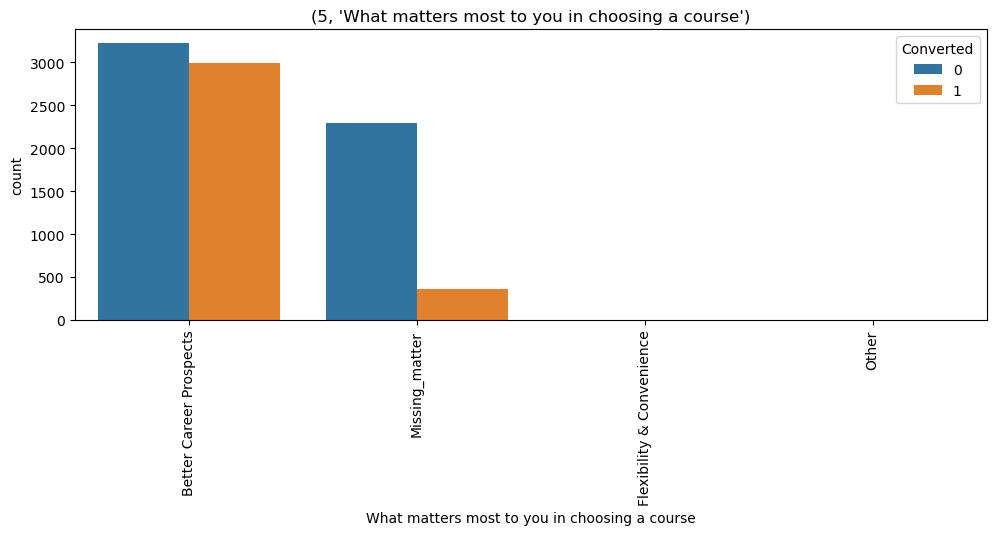

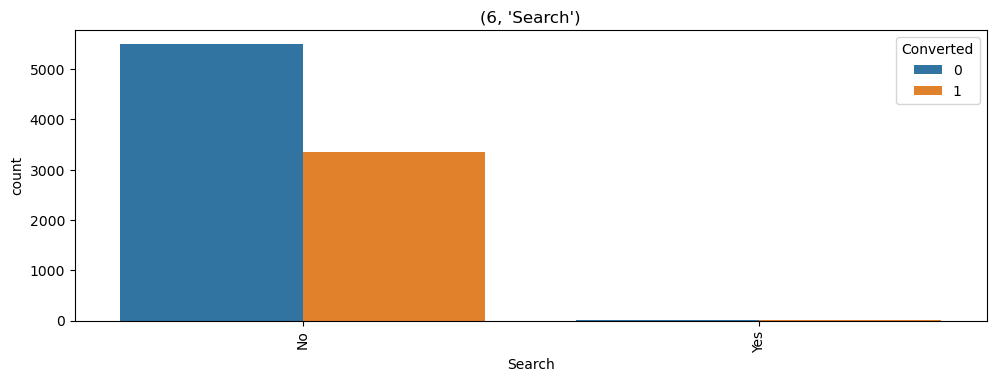

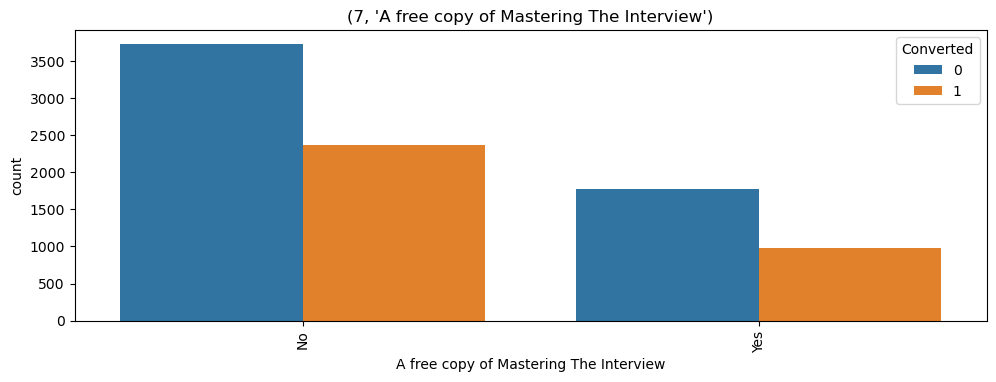

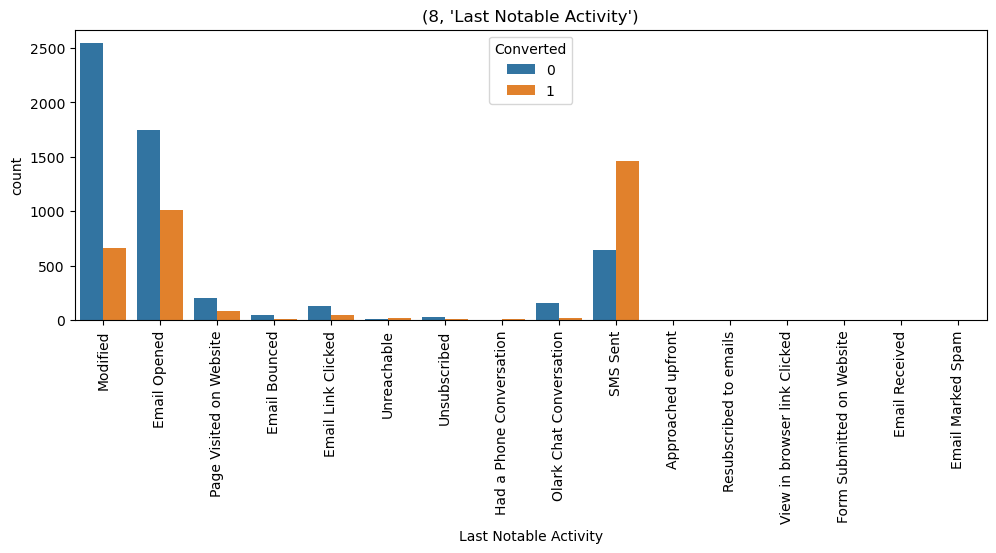

In [57]:
cat_col=["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","What matters most to you in choosing a course",
        "Search","A free copy of Mastering The Interview","Last Notable Activity"]
#plt.figure(figsize=(10,10))
for i in enumerate(cat_col):
    plt.figure(figsize=(40,40))
    plt.subplot(9,3,i[0]+1)
    plt.title(i)

    sns.countplot(data=leads, x=i[1],hue="Converted")
    plt.xticks(rotation=90)

plt.show()

### Conclusion
- From Lead Origin it can be seen that the maximum conversion happened from Landing Page Submission
- From Lead Source It can be seen that Google Search landed the maximum conversion 
- From Last Activity SMS Sent had more conversion
- Finance Management has the high rate of conversion 
- More conversion happend with people who are unemployed.
- Better Career Prospects is the leading cause of conversion 
- Conversion rate is high on leads who are not through search
- Reverting after reading the email has the most conversion 
- Conversion rate is high on leads who do not want a free copy of Mastering Interviews
- From Last Activity SMS Sent had more conversion




## Checking For Numerical Variables:


In [58]:
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

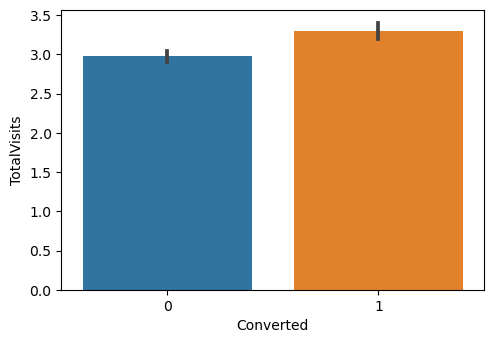

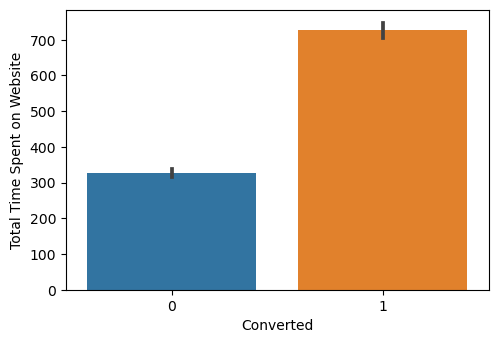

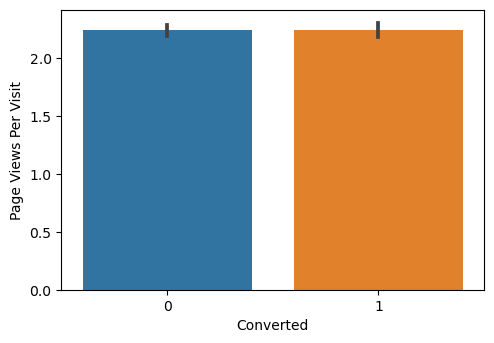

In [59]:
for i in enumerate(num_col) :
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,i[0]+1)
    sns.barplot(y=i[1],x="Converted",data=leads)

### Conclusion 
- The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit



In [60]:
# Checking for Co relations :

leads_corr=leads.corr()

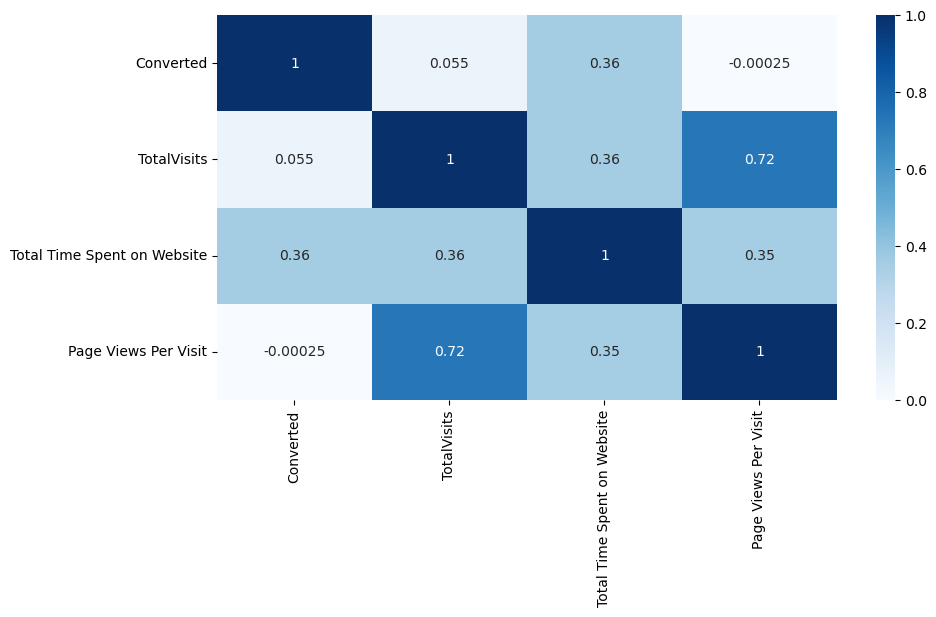

In [61]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr(),annot=True,cmap="Blues")
plt.show()

#### Conclusion 
- **No Corelation found within these numeric  variables**

### Step 4 : Dummy Creation 


In [62]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8863 non-null   object 
 1   Lead Source                                    8863 non-null   object 
 2   Converted                                      8863 non-null   int64  
 3   TotalVisits                                    8863 non-null   float64
 4   Total Time Spent on Website                    8863 non-null   int64  
 5   Page Views Per Visit                           8863 non-null   float64
 6   Last Activity                                  8863 non-null   object 
 7   Specialization                                 8863 non-null   object 
 8   What is your current occupation                8863 non-null   object 
 9   What matters most to you in choosing a course  8863 

In [63]:
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0             Missing_Spec                      Unemployed   
1             Missing_Spec                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4             Missing_Spec                      Unemployed   

  What matters most to you in choosing a course Search  \
0                       Better Career Prospects     No   
1                       Better Career Prospects     No   
2                       Better Career Prospects     No   
3                       Better Career Prospects     No   
4                       Better Career Prospects     No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [64]:
leads.loc[:, leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

####  There are Some variables with "Yes" and "No" values changing them into Binary values Yes: 1 and No:0

In [65]:
var_list=[]
for i in leads.columns:
    if "Yes" in leads[i].values and "No" in leads[i].values:
        var_list.append(i)
print(var_list)

['Search', 'A free copy of Mastering The Interview']


In [66]:
x=['Search', 'A free copy of Mastering The Interview']

In [67]:
leads[x]=leads[x].replace({"Yes":1,"No":0})

In [68]:
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0                      API      Olark Chat          0          0.0   
1                      API  Organic Search          0          5.0   
2  Landing Page Submission  Direct Traffic          1          2.0   
3  Landing Page Submission  Direct Traffic          0          1.0   
4  Landing Page Submission          Google          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0             Missing_Spec                      Unemployed   
1             Missing_Spec                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4             Missing_Spec                      Unemployed   

  What matters most to you in choosing a course  Search  \
0                       Better Career Prospects       0   
1                       Better Career Prospects       0   
2                       Better Career Prospects       0   
3                       Better Career Prospects       0   
4                       Better Career Prospects       0   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [69]:
leads[x]

Search  A free copy of Mastering The Interview
0          0                                       0
1          0                                       0
2          0                                       1
3          0                                       0
4          0                                       0
...      ...                                     ...
9235       0                                       0
9236       0                                       1
9237       0                                       1
9238       0                                       0
9239       0                                       1

[8863 rows x 2 columns]

In [70]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8863 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8863 non-null   object 
 1   Lead Source                                    8863 non-null   object 
 2   Converted                                      8863 non-null   int64  
 3   TotalVisits                                    8863 non-null   float64
 4   Total Time Spent on Website                    8863 non-null   int64  
 5   Page Views Per Visit                           8863 non-null   float64
 6   Last Activity                                  8863 non-null   object 
 7   Specialization                                 8863 non-null   object 
 8   What is your current occupation                8863 non-null   object 
 9   What matters most to you in choosing a course  8863 

In [71]:
leads.loc[:, leads.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

###  CREATING DUMMY FOR CATEGORICAL VARIABLES 

In [72]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_final = pd.concat([leads, dummy], axis=1)
leads_final

Lead Origin     Lead Source  Converted  TotalVisits  \
0                         API      Olark Chat          0          0.0   
1                         API  Organic Search          0          5.0   
2     Landing Page Submission  Direct Traffic          1          2.0   
3     Landing Page Submission  Direct Traffic          0          1.0   
4     Landing Page Submission          Google          1          2.0   
...                       ...             ...        ...          ...   
9235  Landing Page Submission  Direct Traffic          1          8.0   
9236  Landing Page Submission  Direct Traffic          0          2.0   
9237  Landing Page Submission  Direct Traffic          0          2.0   
9238  Landing Page Submission          Google          1          3.0   
9239  Landing Page Submission  Direct Traffic          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  \
0                               0                  0.00   
1                             674                  2.50   
2                            1532                  2.00   
3                             305                  1.00   
4                            1428                  1.00   
...                           ...                   ...   
9235                         1845                  2.67   
9236                          238                  2.00   
9237                          199                  2.00   
9238                          499                  3.00   
9239                         1279                  3.00   

                Last Activity             Specialization  \
0     Page Visited on Website               Missing_Spec   
1                Email Opened               Missing_Spec   
2                Email Opened    Business Administration   
3                 Unreachable      Media and Advertising   
4           Converted to Lead               Missing_Spec   
...                       ...                        ...   
9235        Email Marked Spam     IT Projects Management   
9236                 SMS Sent      Media and Advertising   
9237                 SMS Sent    Business Administration   
9238                 SMS Sent  Human Resource Management   
9239                 SMS Sent    Supply Chain Management   

     What is your current occupation  \
0                         Unemployed   
1                         Unemployed   
2                            Student   
3                         Unemployed   
4                         Unemployed   
...                              ...   
9235                      Unemployed   
9236                      Unemployed   
9237                      Unemployed   
9238                   Missing_Occup   
9239                      Unemployed   

     What matters most to you in choosing a course  ...  \
0                          Better Career Prospects  ...   
1                          Better Career Prospects  ...   
2                          Better Career Prospects  ...   
3                          Better Career Prospects  ...   
4                          Better Career Prospects  ...   
...                                            ...  ...   
9235                       Better Career Prospects  ...   
9236                       Better Career Prospects  ...   
9237                       Better Career Prospects  ...   
9238                                Missing_matter  ...   
9239                       Better Career Prospects  ...   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9235                                                0   
9236                                                0   
9237    

In [73]:
# Drop the variables for which the dummy variables have been created

leads_final=leads_final.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],1)

In [74]:
# Let's take a look at the dataset again

leads_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Search  A free copy of Mastering The Interview  \
0       0                                       0   
1       0                                       0   
2       0                                       1   
3       0                                       0   
4       0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           1  ...   
3                        0                           1  ...   
4                        0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3           

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Step 5: Test-Train Split

-The next step is to split the dataset into training an testing sets.

In [75]:
leads_final.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Search  A free copy of Mastering The Interview  \
0       0                                       0   
1       0                                       0   
2       0                                       1   
3       0                                       0   
4       0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           1  ...   
3                        0                           1  ...   
4                        0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3           

In [76]:
X = leads_final.drop(['Converted'], 1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Search  \
0          0.0                            0                   0.0       0   
1          5.0                          674                   2.5       0   
2          2.0                         1532                   2.0       0   
3          1.0                          305                   1.0       0   
4          2.0                         1428                   1.0       0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   ...  Last Notable Activity_Form Submitted on Website  \
0  ...                                                0   
1  ...                                                0   
2  ...                                                0   
3  ...                                                0   
4  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                           

In [77]:
# Putting the target variable in y variable 
y=leads_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [79]:
X_train.shape

(6204, 86)

In [80]:
X_test.shape

(2659, 86)

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Step 6 : Feature Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [81]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  Search  \
5425       0.1875                     0.064241                0.3750       0   
8586       0.2500                     0.156334                0.5000       0   
4631       0.3125                     0.160377                0.3125       0   
4464       0.1875                     0.084007                0.1875       0   
2058       0.4375                     0.067835                0.1750       0   

      A free copy of Mastering The Interview  \
5425                                       0   
8586                                       1   
4631                                       0   
4464                                       0   
2058                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5425                                    1                          0   
8586                                    1                          0   
4631                                    1                          0   
4464                                    0                          0   
2058                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
5425                        0                           0   
8586                        0                           0   
4631                        0                           0   
4464                        0                           0   
2058                        0                           1   

      Lead Source_Facebook  ...  \
5425                     0  ...   
8586                     0  ...   
4631                     0  ...   
4464                     0  ...   
2058                     0  ...   

      Last Notable Activity_Form Submitted on Website  \
5425                                                0   
8586                                                0   
4631                                                0   
4464                                                0   
2058                                                0   

      Last Notable Activity_Had a Phone Conversation  \
5425                                               0   
8586                                               0   
4631                                               0   
4464                                               0   
2058                                               0   

      Last Notable Activity_Modified  \
5425                               0   
8586                               1   
4631                               0   
4464                               0   
2058                               0   

      Last Notable Activity_Olark Chat Conversation  \
5425                                              0   
8586                                              0   
4631                                              0   
4464                                              0   
2058                                              0   

      Last Notable Activity_Page Visited on Website  \
5425                                              0   
8586                                              0   
4631                                              0   
4464                                              0   
2058                                              0   

      Last Notable Activity_Resubscribed to emails  \
5425                                             0   
8586                                             0   
4631                                             0   
4464                                             0   
2058                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
5425                               1                                  0   
8586                               0                                  0   
4631                               0                                  0   
4464             

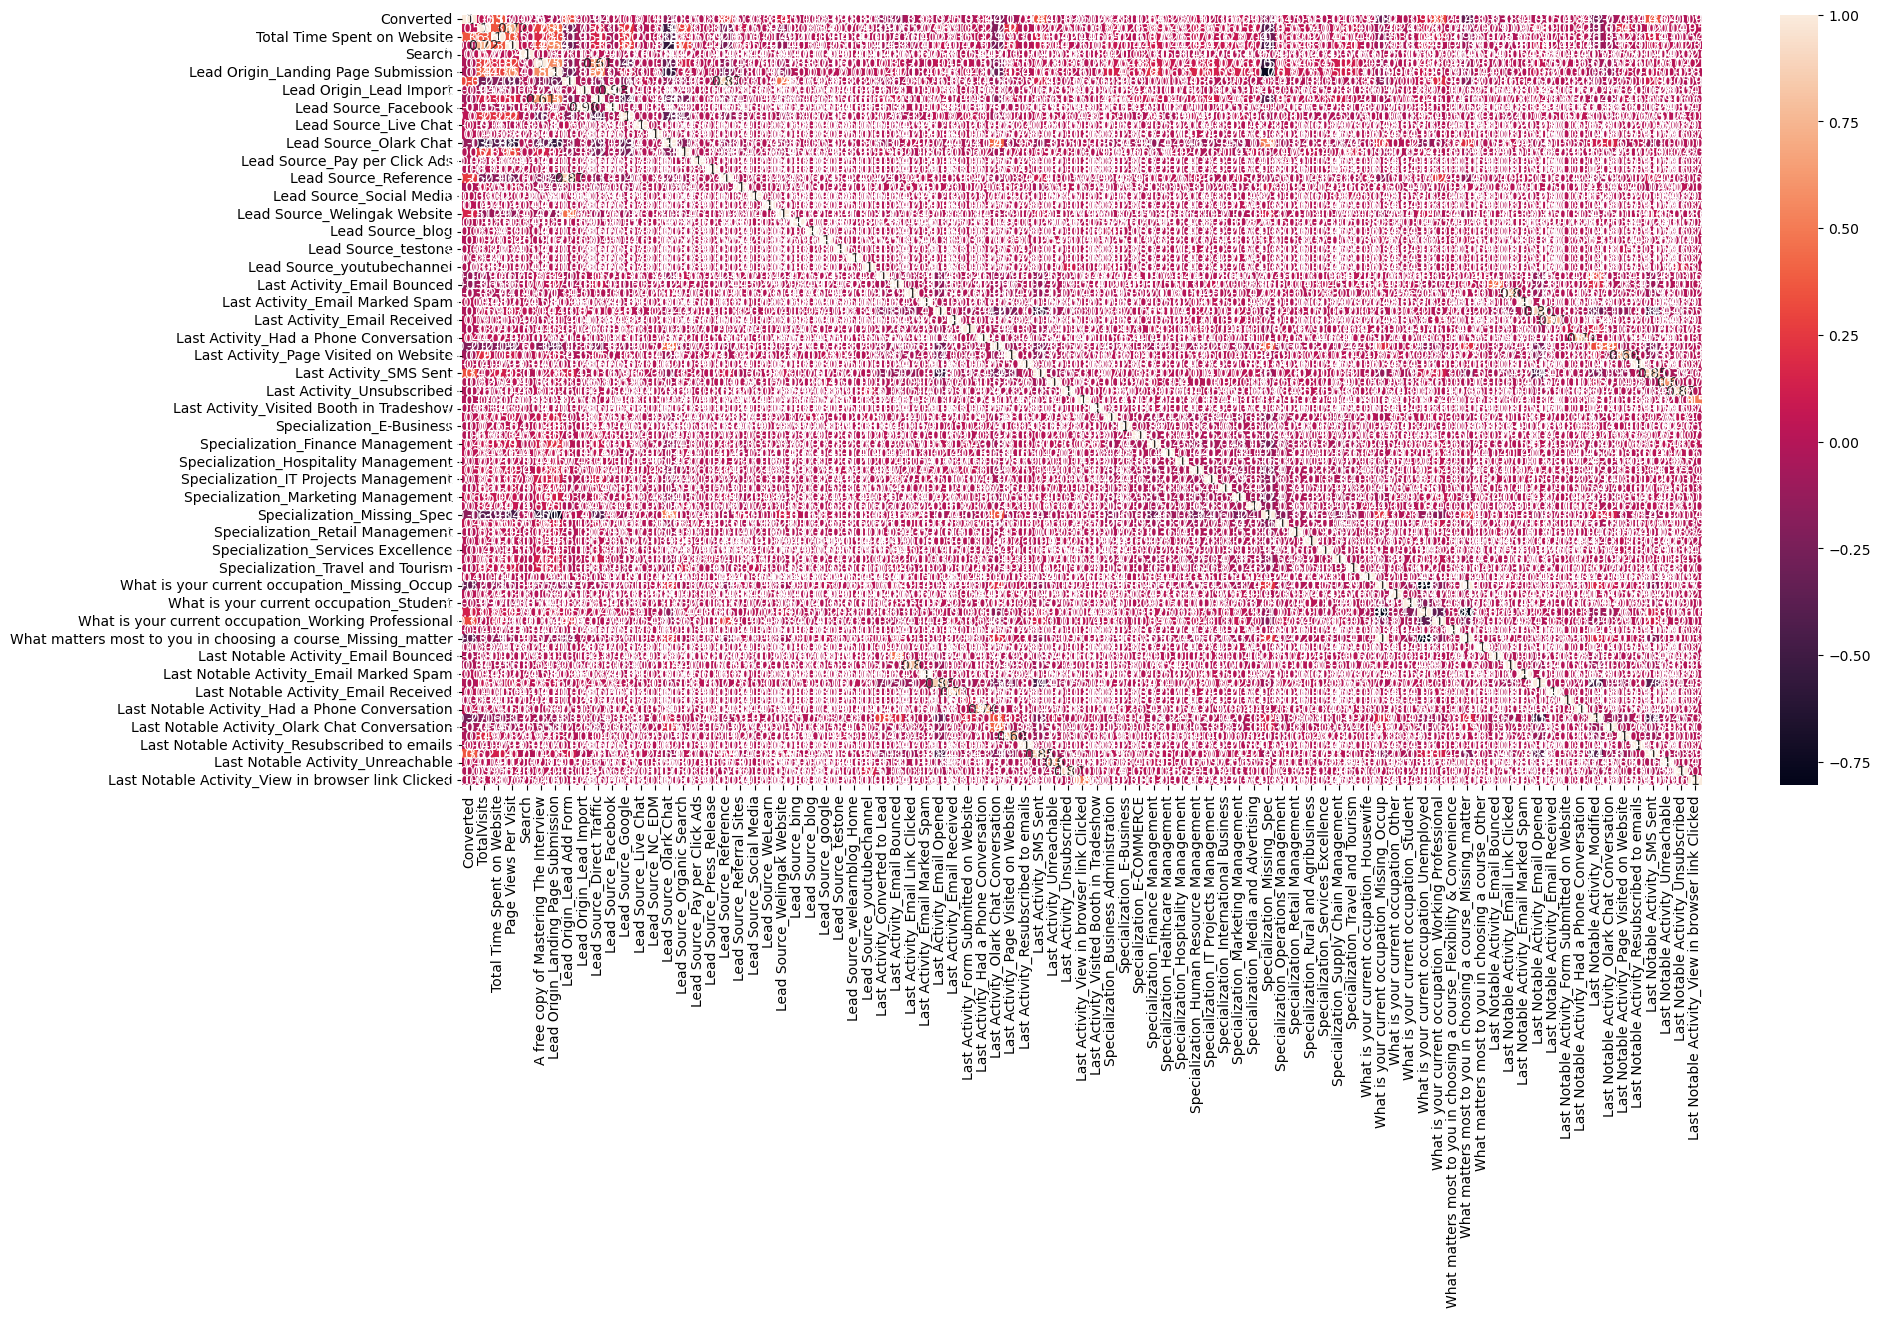

In [82]:
### Step 6: Looking at Correlations
# LET'S SEE THE CORRELATION MATRIX
plt.figure(figsize=(20,10))
sns.heatmap(leads_final.corr(),annot=True)
plt.show()

- **We cannot identify any co relation with this heat map so we will look into corelation data frame**

In [83]:
leads_final.corr()

Converted  TotalVisits  \
Converted                                            1.000000     0.055025   
TotalVisits                                          0.055025     1.000000   
Total Time Spent on Website                          0.356148     0.356784   
Page Views Per Visit                                -0.000255     0.722722   
Search                                               0.000516     0.077023   
...                                                       ...          ...   
Last Notable Activity_Resubscribed to emails         0.013624    -0.011664   
Last Notable Activity_SMS Sent                       0.364496     0.021306   
Last Notable Activity_Unreachable                    0.040513     0.013512   
Last Notable Activity_Unsubscribed                  -0.018658     0.009484   
Last Notable Activity_View in browser link Clicked  -0.008283     0.018452   

                                                    Total Time Spent on Website  \
Converted                                                              0.356148   
TotalVisits                                                            0.356784   
Total Time Spent on Website                                            1.000000   
Page Views Per Visit                                                   0.354975   
Search                                                                 0.012401   
...                                                                         ...   
Last Notable Activity_Resubscribed to emails                          -0.009328   
Last Notable Activity_SMS Sent                                         0.138299   
Last Notable Activity_Unreachable                                      0.011436   
Last Notable Activity_Unsubscribed                                     0.005447   
Last Notable Activity_View in browser link Clicked                    -0.007591   

                                                    Page Views Per Visit  \
Converted                                                      -0.000255   
TotalVisits                                                     0.722722   
Total Time Spent on Website                                     0.354975   
Page Views Per Visit                                            1.000000   
Search                                                          0.043585   
...                                                                  ...   
Last Notable Activity_Resubscribed to emails                   -0.012944   
Last Notable Activity_SMS Sent                                  0.070250   
Last Notable Activity_Unreachable                               0.020888   
Last Notable Activity_Unsubscribed                              0.022801   
Last Notable Activity_View in browser link Clicked              0.002506   

                                                      Search  \
Converted                                           0.000516   
TotalVisits                                         0.077023   
Total Time Spent on Website                         0.012401   
Page Views Per Visit                                0.043585   
Search                                              1.000000   
...                                                      ...   
Last Notable Activity_Resubscribed to emails       -0.000407   
Last Notable Activity_SMS Sent                     -0.014470   
Last Notable Activity_Unreachable                  -0.002271   
Last Notable Activity_Unsubscribed                 -0.002707   
Last Notable Activity_View in browser link Clicked -0.000407   

                                                    A free copy of Mastering The Interview  \
Converted                                                                        -0.031919   
TotalVisits                                                                       0.275745   
Total Time Spent on Website                                                       0.177453   
Page Views Per Visit                                        

####  Running Your First Training Model with all the variables 

In [84]:
# Logistic regression model
import statsmodels.api as sm

In [85]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6124
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2400.0
Date:                Mon, 17 Jul 2023   Deviance:                       4800.1
Time:                        14:37:09   Pearson chi2:                 6.08e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4241
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      23.3503   1.87e+05      0.000      1.000   -3.67e+05    3.67e+05
TotalVisits                                                                 1.8851      0.318      5.923      0.000       1.261       2.509
Total Time Spent on Website                                                 4.5430      0.173     26.227      0.000       4.204       4.883
Page Views Per Visit                                                       -0.9991      0.264     -3.785      0.000      -1.517      -0.482
Search                                                                     -0.6723      0.929     -0.724      0.469      -2.493       1.149
A free copy of Mastering The Interview                                     -0.1315      0.117     -1.124      0.261      -0.361       0.098
Lead Origin_Landing Page Submission                                        -0.8744      0.148     -5.891      0.000      -1.165      -0.583
Lead Origin_Lead Add Form                                                  23.0044   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Lead Import                                                    24.0559   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                                                 22.0634   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Facebook                                                       -1.6101   1.85e+05  -8.69e-06      1.000   -3.63e+05    3.63e+05
Lead Source_Google                                                         22.3546   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Live Chat                                                      24.5690   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_NC_EDM                                                         47.5435   1.85e+05      0.000      1.000   -3.63e+05    3.63e+05
Lead Source_Olark Chat                                                     23.5107   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Organic Search                                                 22.1273   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Pay per Click Ads                                              -0.4363   1.85e+05  -2.36e-06      1.000   -3.63e+05    3.63e+05
Lead Source_Press_Release                                                   0.1666   1.85e+05   8.99e-07      1.000   -3.63e+05    3.63e+05
Lead Source_Reference                                                       2.3622      1.470      1.607      0.108      -0.519       5.244
Lea

###  Step 7 : Model Building using RFE

In [86]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [87]:
 rfe.support_

array([ True,  True, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False])

In [88]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Search', False, 19),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 69),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_NC_EDM', False, 17),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Pay per Click Ads', False, 37),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 53),
 ('Lead Source_blog', False, 38),
 ('Lead Source_google', False, 42),
 ('Le

In [89]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [90]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Search',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Re

#### Now that we  have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [91]:
X_train.shape

(6204, 86)

In [92]:
X_train = X_train[col]

In [93]:
## Fit the X_train data in the by adding constant
X_train_sm = sm.add_constant(X_train)
# Running the logistic  model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
#Fit the model
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.0
Date:                Mon, 17 Jul 2023   Deviance:                       5084.0
Time:                        14:37:20   Pearson chi2:                 6.29e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.5153      0.116    -21.680      0.000      -2.743      -2.288
TotalVisits                                                      1.5941      0.251      6.357      0.000       1.103       2.086
Total Time Spent on Website                                      4.6388      0.168     27.534      0.000       4.309       4.969
Lead Origin_Landing Page Submission                             -0.3339      0.091     -3.678      0.000      -0.512      -0.156
Lead Origin_Lead Add Form                                        3.8061      0.241     15.785      0.000       3.333       4.279
Lead Source_Olark Chat                                           1.4080      0.132     10.637      0.000       1.149       1.667
Lead Source_Welingak Website                                     2.6138      1.033      2.530      0.011       0.589       4.638
Last Activity_Email Bounced                                     -1.4329      0.328     -4.365      0.000      -2.076      -0.790
Last Activity_Had a Phone Conversation                           0.5130      1.218      0.421      0.674      -1.874       2.900
Last Activity_SMS Sent                                           1.4186      0.075     18.854      0.000       1.271       1.566
Specialization_Services Excellence                              -1.3049      0.734     -1.777      0.076      -2.745       0.135
What is your current occupation_Housewife                       24.3694   2.77e+04      0.001      0.999   -5.43e+04    5.44e+04
What is your current occupation_Working Professional             2.5730      0.190     13.543      0.000       2.201       2.945
What matters most to you in choosing a course_Missing_matter    -1.3537      0.088    -15.322      0.000      -1.527      -1.181
Last Notable Activity_Had a Phone Conversation                  23.7268   2.07e+04      0.001      0.999   -4.05e+04    4.05e+04
Last Notable Activity_Unreachable                                2.0088      0.575      3.492      0.000       0.881       3.136
================================================================================================================================
"""

- Since there are quite a few variable which have a p-value greater than `0.05`. We will have to drop them 

In [94]:
## Looking at Variance Inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7              Last Activity_Had a Phone Conversation  3.51
13     Last Notable Activity_Had a Phone Conversation  3.50
0                                         TotalVisits  2.72
2                 Lead Origin_Landing Page Submission  2.66
1                         Total Time Spent on Website  2.08
8                              Last Activity_SMS Sent  1.52
3                           Lead Origin_Lead Add Form  1.51
12  What matters most to you in choosing a course_...  1.46
5                        Lead Source_Welingak Website  1.33
4                              Lead Source_Olark Chat  1.27
11  What is your current occupation_Working Profes...  1.19
6                         Last Activity_Email Bounced  1.06
9                  Specialization_Services Excellence  1.01
14                  Last Notable Activity_Unreachable  1.01
10          What is your current occupation_Housewife  1.00

-  Since the Pvalue of **What is your current occupation_Housewife** is high we will have to drop it

In [95]:
##let's first drop the variable "What is your current occupation_Housewife" since it has a high p-value 
X_train.drop("What is your current occupation_Housewife",axis=1,inplace=True)

In [96]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.9
Date:                Mon, 17 Jul 2023   Deviance:                       5095.8
Time:                        14:37:21   Pearson chi2:                 6.30e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3960
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.5062      0.116    -21.637      0.000      -2.733      -2.279
TotalVisits                                                      1.5762      0.250      6.293      0.000       1.085       2.067
Total Time Spent on Website                                      4.6339      0.168     27.543      0.000       4.304       4.964
Lead Origin_Landing Page Submission                             -0.3267      0.091     -3.603      0.000      -0.504      -0.149
Lead Origin_Lead Add Form                                        3.8193      0.241     15.859      0.000       3.347       4.291
Lead Source_Olark Chat                                           1.4026      0.132     10.607      0.000       1.143       1.662
Lead Source_Welingak Website                                     2.5941      1.033      2.512      0.012       0.570       4.619
Last Activity_Email Bounced                                     -1.4402      0.328     -4.389      0.000      -2.083      -0.797
Last Activity_Had a Phone Conversation                           0.5129      1.217      0.421      0.673      -1.872       2.898
Last Activity_SMS Sent                                           1.4112      0.075     18.777      0.000       1.264       1.559
Specialization_Services Excellence                              -1.3070      0.734     -1.780      0.075      -2.746       0.132
What is your current occupation_Working Professional             2.5658      0.190     13.511      0.000       2.194       2.938
What matters most to you in choosing a course_Missing_matter    -1.3570      0.088    -15.370      0.000      -1.530      -1.184
Last Notable Activity_Had a Phone Conversation                  22.7195   1.25e+04      0.002      0.999   -2.46e+04    2.46e+04
Last Notable Activity_Unreachable                                2.0046      0.575      3.484      0.000       0.877       3.132
================================================================================================================================
"""

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7              Last Activity_Had a Phone Conversation  3.51
12     Last Notable Activity_Had a Phone Conversation  3.50
0                                         TotalVisits  2.72
2                 Lead Origin_Landing Page Submission  2.66
1                         Total Time Spent on Website  2.08
8                              Last Activity_SMS Sent  1.52
3                           Lead Origin_Lead Add Form  1.50
11  What matters most to you in choosing a course_...  1.46
5                        Lead Source_Welingak Website  1.33
4                              Lead Source_Olark Chat  1.27
10  What is your current occupation_Working Profes...  1.19
6                         Last Activity_Email Bounced  1.06
9                  Specialization_Services Excellence  1.01
13                  Last Notable Activity_Unreachable  1.01

- Since the p valye of  **Last Notable Activity_Had a Phone Conversation** is 0.999  we will drop it as the P value is greater than 0.05

In [98]:
adfsdfsdfsdfsfsd

NameError: name 'adfsdfsdfsdfsfsd' is not defined

In [99]:
X_train.drop("Last Notable Activity_Had a Phone Conversation",axis=1,inplace=True)

In [100]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.1
Date:                Mon, 17 Jul 2023   Deviance:                       5102.1
Time:                        14:39:12   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3953
Covariance Type:            nonrobust                                         
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                         TotalVisits  2.72
2                 Lead Origin_Landing Page Submission  2.66
1                         Total Time Spent on Website  2.08
8                              Last Activity_SMS Sent  1.52
3                           Lead Origin_Lead Add Form  1.50
11  What matters most to you in choosing a course_...  1.46
5                        Lead Source_Welingak Website  1.33
4                              Lead Source_Olark Chat  1.27
10  What is your current occupation_Working Profes...  1.19
6                         Last Activity_Email Bounced  1.06
7              Last Activity_Had a Phone Conversation  1.01
9                  Specialization_Services Excellence  1.01
12                  Last Notable Activity_Unreachable  1.01

- Since the P value of **Specialization_Services Excellence** is high 0.07 we will drop this variable

In [102]:
X_train.drop("Specialization_Services Excellence",axis=1,inplace=True)

In [205]:
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6191
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.8
Date:                Mon, 17 Jul 2023   Deviance:                       5105.6
Time:                        16:05:29   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3950
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.5027      0.116    -21.632      0.000      -2.730      -2.276
TotalVisits                                                      1.5705      0.250      6.285      0.000       1.081       2.060
Total Time Spent on Website                                      4.6251      0.168     27.529      0.000       4.296       4.954
Lead Origin_Landing Page Submission                             -0.3274      0.091     -3.617      0.000      -0.505      -0.150
Lead Origin_Lead Add Form                                        3.8176      0.241     15.858      0.000       3.346       4.289
Lead Source_Olark Chat                                           1.3998      0.132     10.596      0.000       1.141       1.659
Lead Source_Welingak Website                                     2.5940      1.033      2.512      0.012       0.570       4.618
Last Activity_Email Bounced                                     -1.4436      0.328     -4.404      0.000      -2.086      -0.801
Last Activity_Had a Phone Conversation                           2.7378      0.834      3.281      0.001       1.102       4.373
Last Activity_SMS Sent                                           1.4067      0.075     18.740      0.000       1.260       1.554
What is your current occupation_Working Professional             2.5599      0.190     13.475      0.000       2.188       2.932
What matters most to you in choosing a course_Missing_matter    -1.3599      0.088    -15.410      0.000      -1.533      -1.187
Last Notable Activity_Unreachable                                2.0065      0.575      3.487      0.000       0.879       3.134
================================================================================================================================
"""

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                         TotalVisits  2.72
2                 Lead Origin_Landing Page Submission  2.66
1                         Total Time Spent on Website  2.08
8                              Last Activity_SMS Sent  1.52
3                           Lead Origin_Lead Add Form  1.50
10  What matters most to you in choosing a course_...  1.46
5                        Lead Source_Welingak Website  1.33
4                              Lead Source_Olark Chat  1.27
9   What is your current occupation_Working Profes...  1.19
6                         Last Activity_Email Bounced  1.06
7              Last Activity_Had a Phone Conversation  1.01
11                  Last Notable Activity_Unreachable  1.01

- All the **P VALUE** and **Variance Inflation Factor** are in the specified range no need to drop any variable 

### Step: 8 Model Evaluation

In [105]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

5425    0.849156
8586    0.010793
4631    0.168314
4464    0.398184
2058    0.039573
1719    0.177755
2286    0.796773
1433    0.257711
5550    0.078504
8333    0.136746
dtype: float64

In [106]:
# Reshaping the values 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84915597, 0.01079349, 0.16831423, 0.39818358, 0.039573  ,
       0.17775489, 0.79677315, 0.25771121, 0.07850393, 0.13674596])

In [107]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          1         0.849156
1          0         0.010793
2          0         0.168314
3          0         0.398184
4          0         0.039573

In [108]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          1         0.849156          1
1          0         0.010793          0
2          0         0.168314          0
3          0         0.398184          0
4          0         0.039573          0

In [109]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3429  434]
 [ 709 1632]]


In [110]:
# Predicted     not_churn    churn
# Actual
# not_churn        3429       434
# churn             709      1632

In [111]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8157640232108317


- **81%** is a accuracy is a a very good value 

In [112]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Calculate the sensitivity

TP/(TP+FN)

0.6971379752242631

In [114]:
# Calculate the specificity

TN/(TN+FP)

0.8876520838726378

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [115]:
y_train_pred_final

Converted  Conversion_Prob  Predicted
0             1         0.849156          1
1             0         0.010793          0
2             0         0.168314          0
3             0         0.398184          0
4             0         0.039573          0
...         ...              ...        ...
6199          0         0.078504          0
6200          0         0.180610          0
6201          0         0.973255          1
6202          0         0.105054          0
6203          0         0.078504          0

[6204 rows x 3 columns]

In [116]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob,drop_intermediate = False)

0.8857511702331997

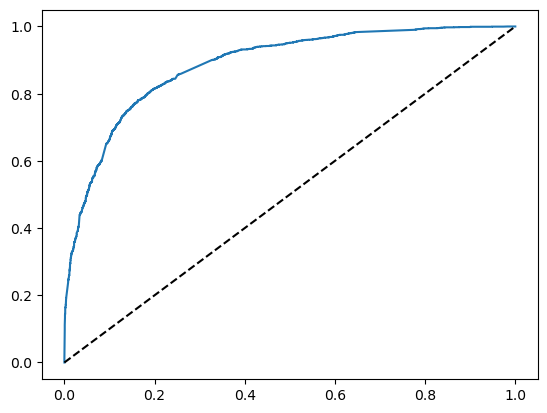

In [118]:
## Area under the curve
auc_score=metrics.roc_auc_score(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
auc_score

- The area under the curve of the ROC is 0.88 which is quite good. So we seem to have a good model.
- Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

### FINDING OPTIMAL CUTOFF

In [119]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.849156          1    1    1    1    1    1    1    1   
1          0         0.010793          0    1    0    0    0    0    0    0   
2          0         0.168314          0    1    1    0    0    0    0    0   
3          0         0.398184          0    1    1    1    1    0    0    0   
4          0         0.039573          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    1    1    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

###  Now let's calculate Accuracy Sensitivity and Specificity for various probability cutoffs.

In [120]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

In [121]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
cm1

array([[3816,   47],
       [1679,  662]], dtype=int64)

In [122]:
sum(sum(cm1))

6204

In [123]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
        total1=sum(sum(cm1))  ## sum of all the cofusion matrix sum
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.377337  1.000000  0.000000
0.1   0.1  0.627176  0.966681  0.421434
0.2   0.2  0.746132  0.917984  0.641988
0.3   0.3  0.799807  0.826570  0.783588
0.4   0.4  0.816409  0.767621  0.845975
0.5   0.5  0.815764  0.697138  0.887652
0.6   0.6  0.797066  0.583938  0.926223
0.7   0.7  0.782882  0.510893  0.947709
0.8   0.8  0.753868  0.397266  0.969972
0.9   0.9  0.721792  0.282785  0.987833


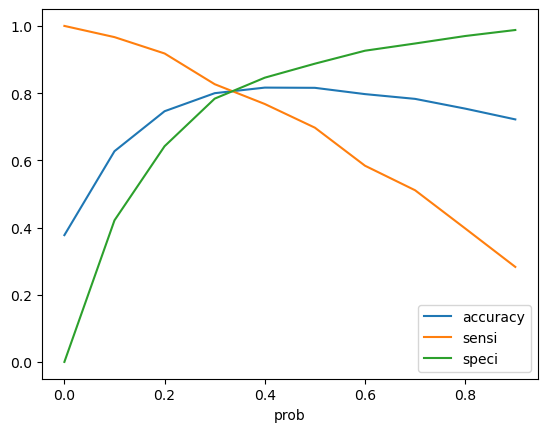

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Considering the threeshold to be 0.35 i.e the point of intersection

In [125]:
y_train_pred_final["final_predicted"]=y_train_pred_final.Conversion_Prob.map(lambda x : 1 if x > 0.35 else 0)

In [126]:
y_train_pred_final.head(10)

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.849156          1    1    1    1    1    1    1    1   
1          0         0.010793          0    1    0    0    0    0    0    0   
2          0         0.168314          0    1    1    0    0    0    0    0   
3          0         0.398184          0    1    1    1    1    0    0    0   
4          0         0.039573          0    1    0    0    0    0    0    0   
5          0         0.177755          0    1    1    0    0    0    0    0   
6          1         0.796773          1    1    1    1    1    1    1    1   
7          1         0.257711          0    1    1    1    0    0    0    0   
8          0         0.078504          0    1    0    0    0    0    0    0   
9          0         0.136746          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    1    1    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                1  
4    0    0    0                0  
5    0    0    0                0  
6    1    0    0                1  
7    0    0    0                0  
8    0    0    0                0  
9    0    0    0                0

#### Calculating the lead Score

In [127]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0           1         0.849156          1    1    1    1    1    1    1    1   
1           0         0.010793          0    1    0    0    0    0    0    0   
2           0         0.168314          0    1    1    0    0    0    0    0   
3           0         0.398184          0    1    1    1    1    0    0    0   
4           0         0.039573          0    1    0    0    0    0    0    0   
5           0         0.177755          0    1    1    0    0    0    0    0   
6           1         0.796773          1    1    1    1    1    1    1    1   
7           1         0.257711          0    1    1    1    0    0    0    0   
8           0         0.078504          0    1    0    0    0    0    0    0   
9           0         0.136746          0    1    1    0    0    0    0    0   
10          0         0.694447          1    1    1    1    1    1    1    1   
11          1         0.403633          0    1    1    1    1    1    0    0   
12          0         0.824505          1    1    1    1    1    1    1    1   
13          0         0.118446          0    1    1    0    0    0    0    0   
14          0         0.017497          0    1    0    0    0    0    0    0   
15          0         0.575356          1    1    1    1    1    1    1    0   
16          0         0.107003          0    1    1    0    0    0    0    0   
17          0         0.582906          1    1    1    1    1    1    1    0   
18          1         0.318702          0    1    1    1    1    0    0    0   
19          0         0.097160          0    1    0    0    0    0    0    0   

    0.7  0.8  0.9  final_predicted  lead_score  
0     1    1    0                1          85  
1     0    0    0                0           1  
2     0    0    0                0          17  
3     0    0    0                1          40  
4     0    0    0                0           4  
5     0    0    0                0          18  
6     1    0    0                1          80  
7     0    0    0                0          26  
8     0    0    0                0           8  
9     0    0    0                0          14  
10    0    0    0                1          69  
11    0    0    0                1          40  
12    1    1    0                1          82  
13    0    0    0                0          12  
14    0    0    0                0           2  
15    0    0    0                1          58  
16    0    0    0                0          11  
17    0    0    0                1          58  
18    0    0    0                0          32  
19    0    0    0                0          10

In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8101225016118633

In [129]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3155,  708],
       [ 470, 1871]], dtype=int64)

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7992310978214439

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.8167227543360083

In [133]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18327724566399173


In [134]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7254749903063202


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8703448275862069


## PRECISION AND RECALL 

In [136]:
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.849156          1    1    1    1    1    1    1    1   
1          0         0.010793          0    1    0    0    0    0    0    0   
2          0         0.168314          0    1    1    0    0    0    0    0   
3          0         0.398184          0    1    1    1    1    0    0    0   
4          0         0.039573          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  lead_score  
0    1    1    0                1          85  
1    0    0    0                0           1  
2    0    0    0                0          17  
3    0    0    0                1          40  
4    0    0    0                0           4

In [137]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3429,  434],
       [ 709, 1632]], dtype=int64)

##### Precision
TP / TP + FP

In [138]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7899322362052275

##### Recall     OF ALL THE TRUES HOW MANY DID YOU DETECT
TP / TP + FN

In [139]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6971379752242631

In [140]:
from sklearn.metrics import precision_score , recall_score

In [141]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7899322362052275

In [142]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6971379752242631

In [143]:
## Precision Recall Curve

In [144]:
from sklearn.metrics import precision_recall_curve

In [145]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    0
 6202    0
 6203    0
 Name: Converted, Length: 6204, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    1
 6202    0
 6203    0
 Name: Predicted, Length: 6204, dtype: int64)

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

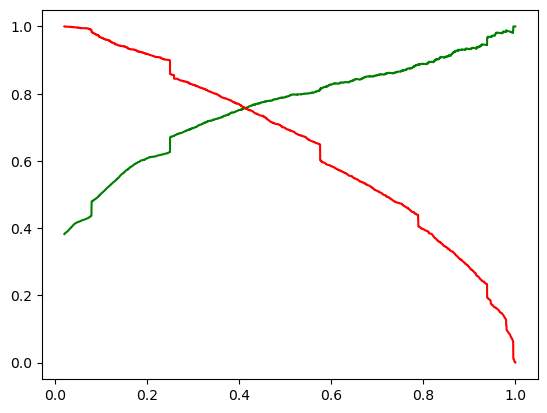

In [204]:
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")


### Considering the Threshold to be 0.4

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)


In [149]:
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.849156          1    1    1    1    1    1    1    1   
1          0         0.010793          0    1    0    0    0    0    0    0   
2          0         0.168314          0    1    1    0    0    0    0    0   
3          0         0.398184          0    1    1    1    1    0    0    0   
4          0         0.039573          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  lead_score  
0    1    1    0                1          85  
1    0    0    0                0           1  
2    0    0    0                0          17  
3    0    0    0                0          40  
4    0    0    0                0           4

In [150]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0           1         0.849156          1    1    1    1    1    1    1    1   
1           0         0.010793          0    1    0    0    0    0    0    0   
2           0         0.168314          0    1    1    0    0    0    0    0   
3           0         0.398184          0    1    1    1    1    0    0    0   
4           0         0.039573          0    1    0    0    0    0    0    0   
5           0         0.177755          0    1    1    0    0    0    0    0   
6           1         0.796773          1    1    1    1    1    1    1    1   
7           1         0.257711          0    1    1    1    0    0    0    0   
8           0         0.078504          0    1    0    0    0    0    0    0   
9           0         0.136746          0    1    1    0    0    0    0    0   
10          0         0.694447          1    1    1    1    1    1    1    1   
11          1         0.403633          0    1    1    1    1    1    0    0   
12          0         0.824505          1    1    1    1    1    1    1    1   
13          0         0.118446          0    1    1    0    0    0    0    0   
14          0         0.017497          0    1    0    0    0    0    0    0   
15          0         0.575356          1    1    1    1    1    1    1    0   
16          0         0.107003          0    1    1    0    0    0    0    0   
17          0         0.582906          1    1    1    1    1    1    1    0   
18          1         0.318702          0    1    1    1    1    0    0    0   
19          0         0.097160          0    1    0    0    0    0    0    0   

    0.7  0.8  0.9  final_predicted  lead_score  
0     1    1    0                1          85  
1     0    0    0                0           1  
2     0    0    0                0          17  
3     0    0    0                0          40  
4     0    0    0                0           4  
5     0    0    0                0          18  
6     1    0    0                1          80  
7     0    0    0                0          26  
8     0    0    0                0           8  
9     0    0    0                0          14  
10    0    0    0                1          69  
11    0    0    0                1          40  
12    1    1    0                1          82  
13    0    0    0                0          12  
14    0    0    0                0           2  
15    0    0    0                1          58  
16    0    0    0                0          11  
17    0    0    0                1          58  
18    0    0    0                0          32  
19    0    0    0                0          10

In [151]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8164087685364281

In [152]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3268,  595],
       [ 544, 1797]], dtype=int64)

In [153]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Calculate Precision

TP/(TP+FP)

0.7512541806020067

In [155]:
# Calculate Recall

TP/(TP+FN)

0.7676206749252457

### STEP 9 : Making Predictions on the Test Set


In [156]:
X_test.shape

(2659, 86)

In [157]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [158]:
X_test = X_test[col]
X_test.head()

TotalVisits  Total Time Spent on Website  \
8788       0.3750                     0.618598   
7813       0.1875                     0.116801   
2403       0.8750                     0.639712   
7243       0.3125                     0.509883   
5363       0.2500                     0.721473   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8788                                    1                          0   
7813                                    1                          0   
2403                                    1                          0   
7243                                    0                          0   
5363                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
8788                       0                             0   
7813                       0                             0   
2403                       0                             0   
7243                       0                             0   
5363                       0                             0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
8788                            0                                       0   
7813                            0                                       0   
2403                            0                                       0   
7243                            0                                       0   
5363                            0                                       0   

      Last Activity_SMS Sent  Specialization_Services Excellence  \
8788                       1                                   0   
7813                       0                                   0   
2403                       1                                   0   
7243                       0                                   0   
5363                       1                                   0   

      What is your current occupation_Housewife  \
8788                                          0   
7813                                          0   
2403                                          0   
7243                                          0   
5363                                          0   

      What is your current occupation_Working Professional  \
8788                                                  0      
7813                                                  0      
2403                                                  0      
7243                                                  0      
5363                                                  0      

      What matters most to you in choosing a course_Missing_matter  \
8788                                                  0              
7813                                                  0              
2403                                                  0              
7243                                                  0              
5363                                                  0              

      Last Notable Activity_Had a Phone Conversation  \
8788                                               0   
7813                                               0   
2403                                               0   
7243                                               0   
5363                                               0   

      Last Notable Activity_Unreachable  
8788                                  0  
7813                                  0  
2403                                  0  
7243                                  0  
5363                                  0

In [159]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [160]:
# Check X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  \
8788    1.0       0.3750                     0.618598   
7813    1.0       0.1875                     0.116801   
2403    1.0       0.8750                     0.639712   
7243    1.0       0.3125                     0.509883   
5363    1.0       0.2500                     0.721473   
...     ...          ...                          ...   
1932    1.0       0.2500                     0.761905   
1974    1.0       0.0000                     0.000000   
6177    1.0       0.6875                     0.507188   
7293    1.0       0.3750                     0.076370   
327     1.0       0.4375                     0.426774   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8788                                    1                          0   
7813                                    1                          0   
2403                                    1                          0   
7243                                    0                          0   
5363                                    1                          0   
...                                   ...                        ...   
1932                                    1                          0   
1974                                    0                          0   
6177                                    1                          0   
7293                                    1                          0   
327                                     0                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
8788                       0                             0   
7813                       0                             0   
2403                       0                             0   
7243                       0                             0   
5363                       0                             0   
...                      ...                           ...   
1932                       0                             0   
1974                       1                             0   
6177                       0                             0   
7293                       0                             0   
327                        0                             0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
8788                            0                                       0   
7813                            0                                       0   
2403                            0                                       0   
7243                            0                                       0   
5363                            0                                       0   
...                           ...                                     ...   
1932                            0                                       0   
1974                            0                                       0   
6177                            0                                       0   
7293                            0                                       0   
327                             0                                       0   

      Last Activity_SMS Sent  Specialization_Services Excellence  \
8788                       1                                   0   
7813                       0                                   0   
2403                       1                                   0   
7243                       0                                   0   
5363                       1                                   0   
...                      ...                                 ...   
1932                       0                                   0   
1974                       0                                   0   
6177                       1                                   0   
7293                       0                                   0   
327                        0          

In [161]:
X_test.drop(["What is your current occupation_Housewife", "Specialization_Services Excellence","Last Notable Activity_Had a Phone Conversation"],axis= 1, inplace = True)

In [162]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [163]:
y_test_pred[:10]

8788    0.883558
7813    0.119679
2403    0.948312
7243    0.585725
5363    0.909378
3918    0.480713
3345    0.078504
917     0.081320
7732    0.029015
1702    0.026063
dtype: float64

In [164]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [165]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [166]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [167]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [168]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          0  0.883558
1          0  0.119679
2          1  0.948312
3          1  0.585725
4          1  0.909378

In [169]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [170]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          0         0.883558
1          0         0.119679
2          1         0.948312
3          1         0.585725
4          1         0.909378

In [171]:
# Make predictions on the test set using 0.4 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [172]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.883558                1
1          0         0.119679                0
2          1         0.948312                1
3          1         0.585725                1
4          1         0.909378                1

In [173]:
y_pred_final['lead_score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))


In [174]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted  lead_score
0          0         0.883558                1          88
1          0         0.119679                0          12
2          1         0.948312                1          95
3          1         0.585725                1          59
4          1         0.909378                1          91

In [175]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7995487025197443

In [176]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1347,  302],
       [ 231,  779]], dtype=int64)

In [177]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [178]:
# Calculate sensitivity
TP / float(TP+FN)

0.7712871287128713

In [179]:
# Calculate specificity
TN / float(TN+FP)

0.8168587022437841

## Precision and Recall on Test Set

In [180]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [181]:
y_test_pred[:10]

8788    0.883558
7813    0.119679
2403    0.948312
7243    0.585725
5363    0.909378
3918    0.480713
3345    0.078504
917     0.081320
7732    0.029015
1702    0.026063
dtype: float64

In [182]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
y_pred_1.head()

0
8788  0.883558
7813  0.119679
2403  0.948312
7243  0.585725
5363  0.909378

In [184]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [185]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [187]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          0  0.883558
1          0  0.119679
2          1  0.948312
3          1  0.585725
4          1  0.909378

In [188]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [189]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [190]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.883558                1
1          0         0.119679                0
2          1         0.948312                1
3          1         0.585725                1
4          1         0.909378                1

In [191]:
y_pred_final['lead_score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))


In [192]:
y_pred_final

Converted  Conversion_Prob  final_predicted  lead_score
0             0         0.883558                1          88
1             0         0.119679                0          12
2             1         0.948312                1          95
3             1         0.585725                1          59
4             1         0.909378                1          91
...         ...              ...              ...         ...
2654          1         0.747698                1          75
2655          1         0.249187                0          25
2656          1         0.881012                1          88
2657          0         0.224193                0          22
2658          1         0.539478                1          54

[2659 rows x 4 columns]

In [193]:
# Calculating Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8055660022564874

In [194]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1391,  258],
       [ 259,  751]], dtype=int64)

In [195]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [196]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7443012884043607

In [197]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7435643564356436

# CONCLUSION



- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 79%, 77% and 81% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.   